In [1]:
%matplotlib inline
import numpy as np
from skyfield.api import load
from scipy.optimize import newton
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import pandas as pd
import plotly
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import ephem
#from footprint import *
from tno_models import trojan, plutino, twotino, fourone
from propagate import propagate

init_notebook_mode(connected=True)
planets = load('de423.bsp')
plotly.tools.set_credentials_file(username='sevenlin123', api_key='vhjhhsCHepMx5oQGJPEp')

In [2]:
ruby = np.array([3.008719617754020E+01, 8.373084272981737E-02, 3.125845724207132E+01*np.pi/180., 2.154449425088119E+02*np.pi/180., 1.925382788635224E+02*np.pi/180., 3.502232533923760E+02*np.pi/180., 2456959.8, 2456658.5])
topaz = np.array([29.998, 0.048, 35.8*np.pi/180, 81.9*np.pi/180, 75.9*np.pi/180, 244.41*np.pi/180, 2458600.5, 2456658.5])
QP = np.array([29.991, 0.063, 19.4*np.pi/180., 96.4*np.pi/180., 3.3*np.pi/180, 307.24*np.pi/180., 2458600.5, 2456658.5])
QO = np.array([30.033, 0.108, 18.8*np.pi/180, 106.9*np.pi/180, 115.7*np.pi/180, 174.57*np.pi/180, 2458600.5, 2456658.5])
SO = np.array([30.098, 0.014, 9.6*np.pi/180, 113.4*np.pi/180, 122.0*np.pi/180, 155.93*np.pi/180, 2458600.5, 2456658.5])
WG = np.array([29.915, 0.031, 22.3*np.pi/180, 352.1*np.pi/180, 220.4*np.pi/180, 209.26*np.pi/180, 2458600.5, 2456658.5])
RJ = np.array([29.945, 0.029, 8.2*np.pi/180, 120.8*np.pi/180, 33.5*np.pi/180, 255.13*np.pi/180, 2458600.5, 2456658.5 ])
TT = np.array([29.975, 0.074, 4.3*np.pi/180, 249.3*np.pi/180, 7.8*np.pi/180, 171.77*np.pi/180, 2458600.5, 2456658.5 ])
QR = np.array([30.163, 0.030, 1.3*np.pi/180, 151.7*np.pi/180, 154.0*np.pi/180, 87.10*np.pi/180, 2458600.5, 2456658.5 ])
TS = np.array([29.892, 0.042, 6.6*np.pi/180, 129.5*np.pi/180, 299.4*np.pi/180, 347.91*np.pi/180, 2458600.5, 2456658.5 ])
RW = np.array([29.9890663, 0.0749342, 30.83373*np.pi/180, 1.30181*np.pi/180, 133.75443*np.pi/180, 247.38858*np.pi/180, 2458600.5, 2456658.5])
VV = np.array([30.0046243, 0.0830537, 16.89126*np.pi/180, 225.15887*np.pi/180, 247.00060*np.pi/180, 312.22087*np.pi/180, 2458600.5, 2456658.5 ])
VW = np.array([29.9879657, 0.0500099, 5.00620*np.pi/180, 78.87562*np.pi/180, 69.16850*np.pi/180, 272.88083*np.pi/180, 2458600.5, 2456658.5])
VX = np.array([29.9694660, 0.0786591, 17.18184*np.pi/180, 226.76558*np.pi/180, 8.81853*np.pi/180, 184.63002*np.pi/180, 2458600.5, 2456658.5])
#object = np.array([ruby, topaz, QO, SO])
object = np.array([SO, WG, RJ, TT, QR, TS])
#object = np.array([RW, VV, VW, VX])
ossos_det_ra = np.array([23.280, 51.147, 46.200, 46.349, 5.380])
ossos_det_dec = np.array([28.683, 16.691, 14.587, 16.377, 5.860])
p = propagate(object.T[0], object.T[1], object.T[2], object.T[3], object.T[4], object.T[5], object.T[6], object.T[7], helio=True)

In [3]:
print(list(zip(p.ra*180/np.pi, p.dec*180/np.pi)))#32.29536  -6.24732

[(20.788296089132157, -1.446024843516687), (45.41822851284024, 13.696281670331217), (30.815528218423406, 12.724945208044101), (55.530227041859185, 23.227983985469074), (21.43572593978007, 7.913629503311471), (36.856527383054555, 21.463233563804096)]


In [4]:
def kep_to_xyz(a, e, i, arg, node, M):
    # compute eccentric anomaly
    f = lambda E, M, e: E - e * np.sin(E) - M
    E0 = M
    E = newton(f, E0, args=(M, e))
    # compute true anomaly
    v = 2 * np.arctan2((1 + e)**0.5*np.sin(E/2.), (1 - e)**0.5*np.cos(E/2.))
    # compute the radius
    r = a * (1 - e*np.cos(E))
    # compute X,Y,Z
    X = r * (np.cos(node) * np.cos(arg + v) - np.sin(node) * np.sin(arg + v) * np.cos(i))
    Y = r * (np.sin(node) * np.cos(arg + v) + np.cos(node) * np.sin(arg + v) * np.cos(i))
    Z = r * (np.sin(i) * np.sin(arg + v))
    return X, Y, Z

In [5]:
xn, yn, zn = zip(*map(kep_to_xyz, 30+np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000), np.arange(0, 6.28, 0.00628)))
x45, y45, z45 = zip(*map(kep_to_xyz, 45+np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000), np.arange(0, 6.28, 0.00628)))

def buildmap(obj_ra, obj_dec, ecliptic_plots=True):
    lon, lat = define_footprint(ecliptic_plots=ecliptic_plots) 
    lon2, lat2 = define_footprint(polydef='round13-poly.txt', ecliptic_plots=ecliptic_plots) 
    m = Basemap(lon_0=0, projection='moll', celestial=True)
    x, y = m( lon, lat )
    x2,y2 = m(lon2, lat2)
    xy = zip(x,y)
    xy2 = zip(x2,y2)
    foot = patches.Polygon( xy, facecolor='cornflowerblue', edgecolor=None, alpha=0.4 )
    foot2 = patches.Polygon( xy2, facecolor='lightpink', edgecolor=None, alpha=0.4 )
    plt.gca().add_patch(foot)
    plt.gca().add_patch(foot2)
    fields = SNfields()
    for f in fields:
        if ecliptic_plots:
            ecl = ephem.Ecliptic(ephem.Equatorial(f.a_ra, f.a_dec))
            lon = ecl.lon if ecl.lon<ephem.degrees('180') else ecl.lon-2*np.pi    
            m.tissot(lon*180/np.pi, ecl.lat*180/np.pi, 1.05, 100, facecolor='g', alpha=0.5)
        else:
            ra = f.a_ra if f.a_ra<ephem.degrees('180') else f.a_ra-2*np.pi
            m.tissot(ra*180/np.pi, f.a_dec*180/np.pi, 1.05, 100, facecolor='r', alpha=0.5)
    obj_ra = obj_ra*180/np.pi
    obj_dec = obj_dec*180/np.pi
    for i in range(len(obj_ra)):
        m.scatter(obj_ra[i], obj_dec[i],3,marker='.',color='k', latlon=True)
    m.drawmapboundary()
    parallels = np.arange(-180.,181,20.)
    m.drawparallels(parallels,labels=[False,True,True,False], alpha=0.4)
    meridians = np.arange(-180.,181.,20.)
    m.drawmeridians(meridians, alpha=0.4)
    return m

plt.figure(figsize=(20,10))
m = buildmap(p.ra, p.dec, ecliptic_plots=False)

In [6]:
t0 = trojan(size = 5000, mjd=59661.0, i_sigma = 26)

/Users/edward/GitHub/fake_tno/tno_models.py:39: RuntimeWarning:

invalid value encountered in arcsin

/Users/edward/GitHub/fake_tno/tno_models.py:237: RuntimeWarning:

invalid value encountered in arcsin

/Users/edward/GitHub/fake_tno/tno_models.py:210: RuntimeWarning:

invalid value encountered in less



In [7]:
t1 = trojan(size = 5000, mjd=63314.0, i_sigma = 26)

NameError: name 't' is not defined

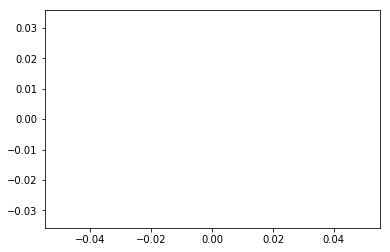

In [8]:
plt.axis('equal')
plt.scatter(t.X,t.Y, marker = '.')
plt.plot(xn, yn, 'y')
plt.plot(x45, y45, 'y')
plt.plot(t.x_n, t.y_n, 'ro')

NameError: name 't' is not defined

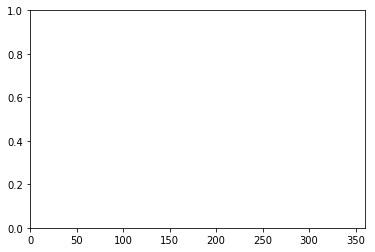

In [9]:
plt.xlim(0,360)
#t.ra[t.ra > np.pi] -= 2*np.pi
plt.plot(t.ra*180/np.pi, t.dec*180/np.pi, '.')

plt.figure(figsize=(20,10))
m = buildmap(t.ra, t.dec, ecliptic_plots=False)

In [10]:
BC = np.loadtxt('radec_BC.list')
BD = np.loadtxt('radec_BD.list')
BH = np.loadtxt('radec_BH.list')
BL = np.loadtxt('radec_BL.list')
BS = np.loadtxt('radec_BS.list')
BT = np.loadtxt('radec_BT.list')
mala = np.loadtxt('radec_mala.list')
maha = np.loadtxt('radec_maha.list')
AM = np.loadtxt('radec_AM.list')
AO = np.loadtxt('radec_AO.list')
AE = np.loadtxt('radec_AE.list')
AP = np.loadtxt('radec_AP.list')

OSError: radec_mala.list not found.

In [11]:
des = np.loadtxt('round13-poly.txt', comments = '#')
des = [des]
ossos = [BC, BD, BH, BL, BS, BT, AM, AO, AE, AP, mala, maha]

NameError: name 'AM' is not defined

def buildmap(obj_ra, obj_dec, ecliptic_plots=True):
    plt.figure(figsize=(20,10))
    m = Basemap(lon_0=0, projection='moll', celestial=True)
    plane_lon = np.arange(-np.pi, np.pi, .1*np.pi/180.)
    plane_lat = np.zeros(len(plane_lon))
    plane_p15 = np.zeros(len(plane_lon))+12*np.pi/180.
    plane_m15 = np.zeros(len(plane_lon))-12*np.pi/180.
    ecl_plane = np.zeros([len(plane_lat), 2])
    ecl_plane_p15 = np.zeros([len(plane_lat), 2])
    ecl_plane_m15 = np.zeros([len(plane_lat), 2])
    gal_plane = np.zeros([len(plane_lat), 2])
    for i in range(len(plane_lat)):
        ecl_plane[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_lat[i])).get()
        ecl_plane_p15[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_p15[i])).get()
        ecl_plane_m15[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_m15[i])).get()
        gal_plane[i] = ephem.Equatorial(ephem.Galactic(plane_lon[i], plane_lat[i])).get()
        m.scatter(gal_plane[i][0]*180/np.pi, gal_plane[i][1]*180/np.pi,1,marker='o',color='steelblue', latlon=True)
        
    m.scatter(ecl_plane.T[0]*180/np.pi, ecl_plane.T[1]*180/np.pi,3,marker='o',color='darkorange', latlon=True)
    m.scatter(ecl_plane_p15.T[0]*180/np.pi, ecl_plane_p15.T[1]*180/np.pi,1,marker='.',color='orange', latlon=True)
    m.scatter(ecl_plane_m15.T[0]*180/np.pi, ecl_plane_m15.T[1]*180/np.pi,1,marker='.',color='orange', latlon=True)

    obj_ra = obj_ra*180/np.pi
    obj_dec = obj_dec*180/np.pi
    for i in range(len(obj_ra)):
        m.scatter(obj_ra[i], obj_dec[i],3,marker='.',color='k', latlon=True, alpha=0.3)
       
    m.drawmapboundary()
    parallels = np.arange(-180.,181,20.)
    m.drawparallels(parallels,labels=[False,True,True,False], alpha=0.8)
    meridians = np.arange(-180.,181.,20.)
    m.drawmeridians(meridians, alpha=0.4)
    plt.legend(fontsize = 16, loc = 4)
    return m

plt.figure(figsize=(20,10))
m = buildmap(t.ra, t.dec, ecliptic_plots=False)

In [12]:
def radec2project(ra, dec):
    ra[ra>180] -= 360
    return (-np.radians(ra), np.radians(dec))

In [13]:
Path = mpath.Path
ps1 = [
    (Path.MOVETO, (-np.pi, -30*np.pi/180)),
    (Path.LINETO, (-np.pi, np.pi/2)),
    (Path.LINETO, (np.pi, np.pi/2)),
    (Path.LINETO, (np.pi, -30*np.pi/180)),
    (Path.CLOSEPOLY, (-np.pi, -30*np.pi/180)),
    ]
codes, verts = zip(*ps1)
path = mpath.Path(verts, codes)
patch_ps1 = mpatches.PathPatch(path, facecolor='r', alpha=0.1)

In [14]:
def plot_sky_pos(ra, dec, ra1, dec1, patch = [], ps1 = False):
    fig = plt.figure(figsize=(15, 8))
    ax = plt.subplot(111, projection="mollweide")
    x, y = radec2project(ra, dec)
    ax.scatter(x, y, marker='.',color='grey', alpha=0.4)
    x, y = radec2project(ra1, dec1)
    ax.scatter(x, y, marker='.',color='gold', alpha=0.3)
    
    if ps1:
        x, y = zip(*path.vertices)
        ax.add_patch(patch_ps1)
    
    if patch != []:
        for i in patch:
            x, y = radec2project(i.T[0], i.T[1])
            ax.plot(x, y, color = 'slateblue', alpha=.5)
    
    plt.yticks(fontsize=20)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    #ax.get_xaxis().set_visible(False)
    plane_lon = np.arange(-np.pi, np.pi, .1*np.pi/180.)
    plane_lat = np.zeros(len(plane_lon))
    plane_p15 = np.zeros(len(plane_lon))+10*np.pi/180.
    plane_m15 = np.zeros(len(plane_lon))-10*np.pi/180.
    ecl_plane = np.zeros([len(plane_lat), 2])
    ecl_plane_p15 = np.zeros([len(plane_lat), 2])
    ecl_plane_m15 = np.zeros([len(plane_lat), 2])
    gal_plane = np.zeros([len(plane_lat), 2])
    gal_plane_p10 = np.zeros([len(plane_lat), 2])
    gal_plane_m10 = np.zeros([len(plane_lat), 2])
    for i in range(len(plane_lat)):
        ecl_plane[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_lat[i])).get()
        ecl_plane_p15[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_p15[i])).get()
        ecl_plane_m15[i] = ephem.Equatorial(ephem.Ecliptic(plane_lon[i], plane_m15[i])).get()
        gal_plane[i] = ephem.Equatorial(ephem.Galactic(plane_lon[i], plane_lat[i])).get()
        gal_plane_p10[i] = ephem.Equatorial(ephem.Galactic(plane_lon[i], plane_p15[i])).get()
        gal_plane_m10[i] = ephem.Equatorial(ephem.Galactic(plane_lon[i], plane_m15[i])).get()
    
    x, y = radec2project(gal_plane.T[0]*180/np.pi, gal_plane.T[1]*180/np.pi)
    ax.scatter(x, y,1,marker='o',color='steelblue') 
    x, y = radec2project(gal_plane_p10.T[0]*180/np.pi, gal_plane_p10.T[1]*180/np.pi)
    ax.scatter(x, y,1,marker='o',color='skyblue') 
    x, y = radec2project(gal_plane_m10.T[0]*180/np.pi, gal_plane_m10.T[1]*180/np.pi)
    ax.scatter(x, y,1,marker='o',color='skyblue') 
    x, y = radec2project(ecl_plane.T[0]*180/np.pi, ecl_plane.T[1]*180/np.pi)
    ax.scatter(x, y,3,marker='o',color='darkorange')
    x, y = radec2project(ecl_plane_p15.T[0]*180/np.pi, ecl_plane_p15.T[1]*180/np.pi)
    ax.scatter(x, y ,1,marker='.',color='orange')
    x, y = radec2project(ecl_plane_m15.T[0]*180/np.pi, ecl_plane_m15.T[1]*180/np.pi)
    ax.scatter(x, y ,1,marker='.',color='orange')
    
    #print(ecl_plane)
    #x, y = radec2project(p.ra, p.dec)
    #ax.scatter(x*180/np.pi, y*180/np.pi, marker='o',color='b', alpha=1)    
    #x, y = radec2project(ossos_det_ra*np.pi/180, ossos_det_dec*np.pi/180)
    #ax.scatter(x*180/np.pi, y*180/np.pi, marker='o',color='k', alpha=1)
    #ax.plot(x[0]*180/np.pi, y[0]*180/np.pi, marker='*',color='r', alpha=1, markersize=18)
    #ax.plot(32.29536,  -6.24732, marker='o',color='b', alpha=1)
    plt.grid(True)
    plt.savefig('neptune_trojan.pdf')

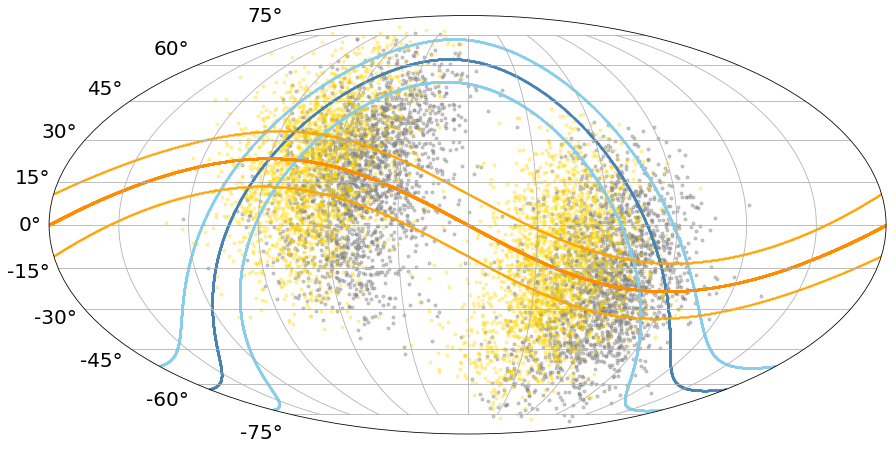

In [15]:
plot_sky_pos(t0.ra*180/np.pi, t0.dec*180/np.pi, t1.ra*180/np.pi, t1.dec*180/np.pi)

In [16]:
len(t.ra)/5

NameError: name 't' is not defined

In [ ]:
two = twotino(size = 5000, mjd=57023, amp_c = 3, amp_max = 5, amp_min = 0)

(array([169., 436., 626., 681., 700., 652., 522., 440., 311., 209., 122.,
         59.,  37.,  13.,  11.,   6.,   3.,   0.,   2.,   1.]),
 array([ 0.11942457,  1.56061434,  3.00180411,  4.44299388,  5.88418365,
         7.32537342,  8.76656319, 10.20775296, 11.64894273, 13.0901325 ,
        14.53132227, 15.97251204, 17.41370181, 18.85489159, 20.29608136,
        21.73727113, 23.1784609 , 24.61965067, 26.06084044, 27.50203021,
        28.94321998]),
 <a list of 20 Patch objects>)

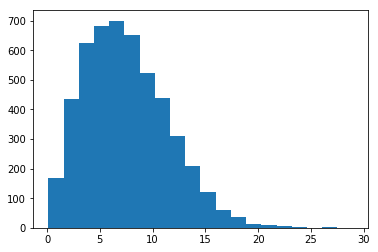

In [15]:
plt.hist((two.i)*180/np.pi, bins = 20)

(array([252., 340., 359., 345., 402., 354., 237., 155.,  51.,  64.,  50.,
         57., 157., 239., 334., 316., 346., 392., 301., 249.]),
 array([  7.16745467,  22.1284873 ,  37.08951993,  52.05055256,
         67.01158518,  81.97261781,  96.93365044, 111.89468307,
        126.8557157 , 141.81674832, 156.77778095, 171.73881358,
        186.69984621, 201.66087884, 216.62191146, 231.58294409,
        246.54397672, 261.50500935, 276.46604197, 291.4270746 ,
        306.38810723]),
 <a list of 20 Patch objects>)

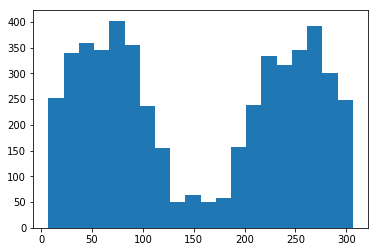

In [16]:
plt.hist((two.phi+two.lambda_N)%(2*np.pi)*180/np.pi, bins = 20)

(array([  7.,  20.,  34.,  63.,  98., 172., 223., 281., 234., 224., 216.,
        301., 356., 421., 516., 638., 627., 426., 125.,  12.]),
 array([21.92635371, 22.11309097, 22.29982824, 22.4865655 , 22.67330277,
        22.86004003, 23.0467773 , 23.23351456, 23.42025183, 23.6069891 ,
        23.79372636, 23.98046363, 24.16720089, 24.35393816, 24.54067542,
        24.72741269, 24.91414995, 25.10088722, 25.28762448, 25.47436175,
        25.66109901]),
 <a list of 20 Patch objects>)

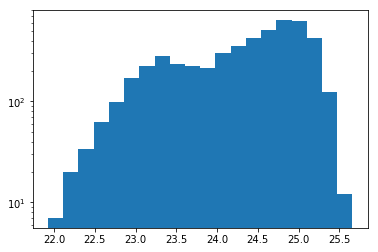

In [17]:
plt.yscale('log')
plt.hist(t.mag_r, bins = 20)

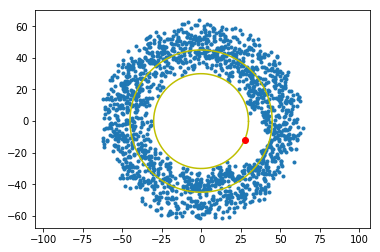

In [18]:
plt.axis('equal')
plt.scatter(two.X[two.phi0 == 0],two.Y[two.phi0 == 0], marker = '.')
plt.plot(xn, yn, 'y')
plt.plot(x45, y45, 'y')
plt.plot(two.x_n, two.y_n, 'ro')

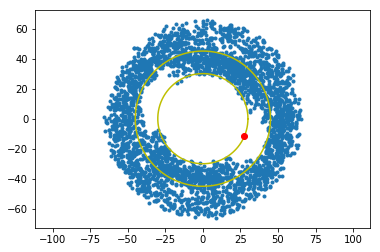

In [19]:
plt.axis('equal')
plt.scatter(two.X[two.phi0 != 0],two.Y[two.phi0 != 0], marker = '.')
plt.plot(xn, yn, 'y')
plt.plot(x45, y45, 'y')
plt.plot(two.x_n, two.y_n, 'ro')

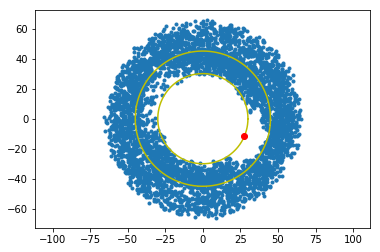

In [20]:
plt.axis('equal')
plt.scatter(two.X,two.Y, marker = '.')
plt.plot(xn, yn, 'y')
plt.plot(x45, y45, 'y')
plt.plot(two.x_n, two.y_n, 'ro')